# Pytorch1.9.1_Cuda11.1简单测试

In [21]:
import torch

In [22]:
import time

In [23]:
import numpy

In [24]:
torch.cuda.is_available()

True

In [25]:
torch.__version__

'1.11.0.dev20211001+cu111'

In [26]:
a=torch.randn(10000,5000)
b=torch.randn(5000,2000)

In [27]:
t0=time.time()
c=torch.matmul(a,b)
t1=time.time()
print(a.device,t1-t0,c.norm(2))

cpu 0.7251508235931396 tensor(315051.4062)


In [28]:
device=torch.device('cuda')
a=a.to(device)
b=b.to(device)

t0=time.time()
c=torch.matmul(a,b)
t2=time.time()
print(a.device,t2-t0,c.norm(2))

cuda:0 0.006943941116333008 tensor(315967.0938, device='cuda:0')


## Linear Regression实战：解二元一次方程

### 一、准备数据

In [76]:
from torch.autograd import Variable

加入Varibale,其包含三个属性：

①data：存储了Tensor，是本体的数据

②grad：保存了data的梯度，本事是个Variable而非Tensor，与data形状一致

③grad_fn：指向Function对象，用于反向传播的梯度计算之用


In [77]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

↑↑这一行很重要，防止内核挂掉

In [78]:
x = Variable(torch.linspace(0,100).type(torch.FloatTensor))

创建Variable张量,可以理解为这种类型的张量具有梯度的定义，可以求导

In [79]:
rand = Variable(torch.randn(100))*10

y = x + rand

In [80]:
x_train = x[: -10]
x_test = x[-10 :]
y_train = y[: -10]
y_test = y[-10 :]

In [81]:
import matplotlib.pyplot as plt

加入绘图工具包

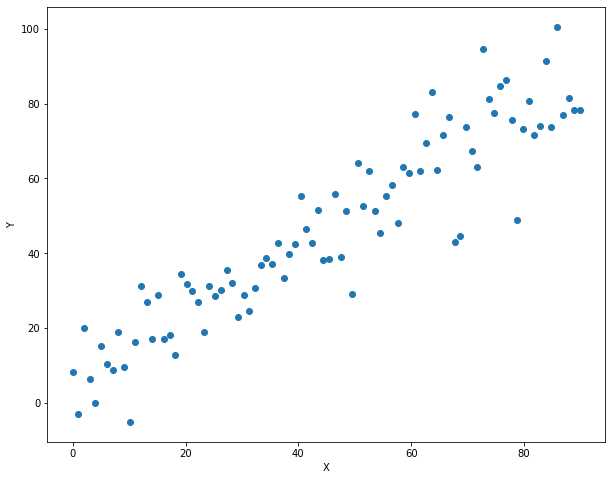

In [82]:
plt.figure(figsize=(10,8))
plt.plot(x_train.data.numpy(),y_train.data.numpy(),'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 二、训练模型

In [83]:
a = Variable(torch.rand(1),requires_grad = True)
b = Variable(torch.rand(1),requires_grad = True)

随机初始化y=ax+b中的a和b

In [84]:
learning_rate =0.0001

设置学习率（步长）

In [85]:
for i in range(1000):
    
    predictions = a.expand_as(x_train) * x_train  + b.expand_as(x_train)
    #定义拟合曲线（离散值），a、b扩维，扩维后作张量元素数乘（一一对应）得到y=ax+b的数据
    
    loss = torch.mean((predictions - y_train) ** 2)
    #定义损失函数：方差（命名为loss）
    
    print('loss:',loss)
    
    loss.backward()
    #backward：回传loss的梯度值（沿链式法则计算图反向传值）

    a.data.add_( - learning_rate * a.grad.data)
    b.data.add_( - learning_rate * b.grad.data)
    #梯度下降：下一个a等于前一个a沿loss减小最快的方向走步长learning_rate*loss
    #（下降的梯度取负号，a朝损失函数的梯度下降最快的方向前进）
    
    a.grad.data.zero_()
    b.grad.data.zero_()
    #梯度归零，准备进入下一次循环

loss: tensor(1037.1959, grad_fn=<MeanBackward0>)
loss: tensor(293.5552, grad_fn=<MeanBackward0>)
loss: tensor(137.5414, grad_fn=<MeanBackward0>)
loss: tensor(104.8096, grad_fn=<MeanBackward0>)
loss: tensor(97.9419, grad_fn=<MeanBackward0>)
loss: tensor(96.5004, grad_fn=<MeanBackward0>)
loss: tensor(96.1973, grad_fn=<MeanBackward0>)
loss: tensor(96.1331, grad_fn=<MeanBackward0>)
loss: tensor(96.1189, grad_fn=<MeanBackward0>)
loss: tensor(96.1153, grad_fn=<MeanBackward0>)
loss: tensor(96.1138, grad_fn=<MeanBackward0>)
loss: tensor(96.1128, grad_fn=<MeanBackward0>)
loss: tensor(96.1119, grad_fn=<MeanBackward0>)
loss: tensor(96.1111, grad_fn=<MeanBackward0>)
loss: tensor(96.1102, grad_fn=<MeanBackward0>)
loss: tensor(96.1094, grad_fn=<MeanBackward0>)
loss: tensor(96.1085, grad_fn=<MeanBackward0>)
loss: tensor(96.1077, grad_fn=<MeanBackward0>)
loss: tensor(96.1068, grad_fn=<MeanBackward0>)
loss: tensor(96.1059, grad_fn=<MeanBackward0>)
loss: tensor(96.1051, grad_fn=<MeanBackward0>)
loss: te

loss: tensor(95.8528, grad_fn=<MeanBackward0>)
loss: tensor(95.8520, grad_fn=<MeanBackward0>)
loss: tensor(95.8511, grad_fn=<MeanBackward0>)
loss: tensor(95.8503, grad_fn=<MeanBackward0>)
loss: tensor(95.8495, grad_fn=<MeanBackward0>)
loss: tensor(95.8486, grad_fn=<MeanBackward0>)
loss: tensor(95.8478, grad_fn=<MeanBackward0>)
loss: tensor(95.8470, grad_fn=<MeanBackward0>)
loss: tensor(95.8462, grad_fn=<MeanBackward0>)
loss: tensor(95.8453, grad_fn=<MeanBackward0>)
loss: tensor(95.8445, grad_fn=<MeanBackward0>)
loss: tensor(95.8437, grad_fn=<MeanBackward0>)
loss: tensor(95.8428, grad_fn=<MeanBackward0>)
loss: tensor(95.8420, grad_fn=<MeanBackward0>)
loss: tensor(95.8412, grad_fn=<MeanBackward0>)
loss: tensor(95.8404, grad_fn=<MeanBackward0>)
loss: tensor(95.8395, grad_fn=<MeanBackward0>)
loss: tensor(95.8387, grad_fn=<MeanBackward0>)
loss: tensor(95.8378, grad_fn=<MeanBackward0>)
loss: tensor(95.8370, grad_fn=<MeanBackward0>)
loss: tensor(95.8362, grad_fn=<MeanBackward0>)
loss: tensor(

loss: tensor(95.5534, grad_fn=<MeanBackward0>)
loss: tensor(95.5526, grad_fn=<MeanBackward0>)
loss: tensor(95.5518, grad_fn=<MeanBackward0>)
loss: tensor(95.5510, grad_fn=<MeanBackward0>)
loss: tensor(95.5502, grad_fn=<MeanBackward0>)
loss: tensor(95.5494, grad_fn=<MeanBackward0>)
loss: tensor(95.5486, grad_fn=<MeanBackward0>)
loss: tensor(95.5478, grad_fn=<MeanBackward0>)
loss: tensor(95.5470, grad_fn=<MeanBackward0>)
loss: tensor(95.5462, grad_fn=<MeanBackward0>)
loss: tensor(95.5454, grad_fn=<MeanBackward0>)
loss: tensor(95.5446, grad_fn=<MeanBackward0>)
loss: tensor(95.5438, grad_fn=<MeanBackward0>)
loss: tensor(95.5430, grad_fn=<MeanBackward0>)
loss: tensor(95.5422, grad_fn=<MeanBackward0>)
loss: tensor(95.5414, grad_fn=<MeanBackward0>)
loss: tensor(95.5406, grad_fn=<MeanBackward0>)
loss: tensor(95.5398, grad_fn=<MeanBackward0>)
loss: tensor(95.5390, grad_fn=<MeanBackward0>)
loss: tensor(95.5382, grad_fn=<MeanBackward0>)
loss: tensor(95.5374, grad_fn=<MeanBackward0>)
loss: tensor(

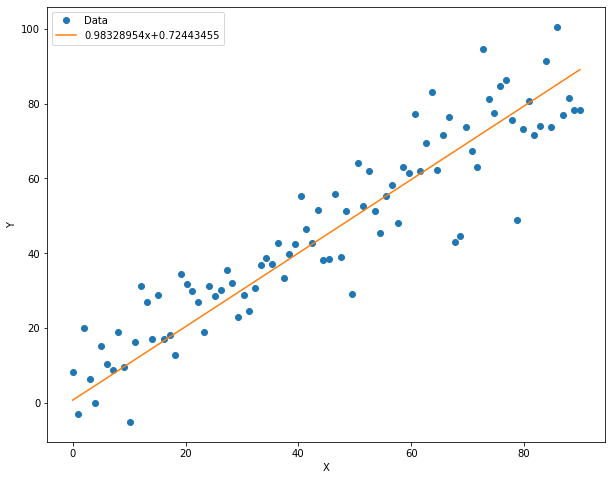

In [86]:
x_data = x_train.data.numpy()

plt.figure(figsize=(10,8))

xplot, = plt.plot(x.data[: -10],y_train.data.numpy(),'o')
yplot, = plt.plot(x.data[: -10],a.data.numpy()*x_data + b.data.numpy())

#x.data[: -10]，为了确保x,y维度一致

plt.xlabel('X')
plt.ylabel('Y')

str1 = str(a.data.numpy()[0]) + 'x+' + str(b.data.numpy()[0])

plt.legend([xplot,yplot],['Data',str1])
plt.show()

## 三、预测

In [87]:
predictions = a.expand_as(x_test) * x_test + b.expand_as(x_test)
predictions

tensor([90.1144, 91.1076, 92.1008, 93.0941, 94.0873, 95.0805, 96.0737, 97.0669,
        98.0602, 99.0534], grad_fn=<AddBackward0>)

90
10
90
10


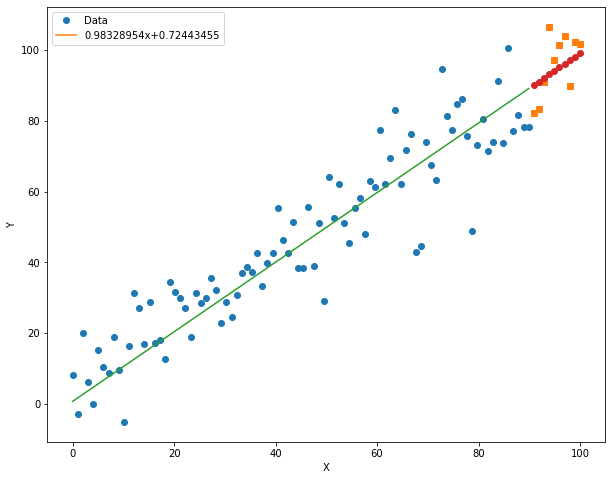

In [88]:
x_data = x_train.data.numpy()
x_pred = x_test.data.numpy()

print(x_data.size)
print(x_pred.size)
print(y_train.data.numpy().size)
print(y_test.data.numpy().size)

plt.figure(figsize=(10,8))

plt.plot(x.data[: -10],y_train.data.numpy(),'o')
plt.plot(x.data[-10 :],y_test.data.numpy(),'s')

#x.data[: -10]，为了确保x,y维度一致

plt.plot(x_data,a.data.numpy()* x_data + b.data.numpy())
plt.plot(x_pred,a.data.numpy()* x_pred + b.data.numpy(),'o')

plt.xlabel('X')
plt.ylabel('Y')

str1 = str(a.data.numpy()[0]) + 'x+' + str(b.data.numpy()[0])
plt.legend([xplot,yplot],['Data',str1])
plt.show()

结论：预测效果较为理想。